<a href="https://colab.research.google.com/github/roque-alfaro/taller-eiv-2026/blob/main/4_Ejercicio_visualizaciones_y_reportes(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurar área de trabajo y cargar datos
Usaremos las librerías de [Plotly](https://plotly.com/graphing-libraries/) para construir gráficos interactivos 📊✨.

In [1]:
#borrar objetos previos
rm(list=ls())
#borrar figuras (si hay)
while(!dev.cur())dev.off()
cat("\014")

# Marcados con '#' es código que se computa. Queda como comentario

# para leer planillas y exportar .csvs
#if(!require("readr")) install.packages("readr", quiet=TRUE)
# para leer planillas excel
#if(!require("readxl")) install.packages("readxl", quiet=TRUE)
# para manipulación de datos
#if(!require("dplyr")) install.packages("dplyr", repos = "https://cran.rstudio.com/", quiet = TRUE)
# Instalar librería para gráficos
#if(!require(ggplot2)){install.packages("ggplot2", repos = "https://packagemanager.posit.co/cran/latest")}
# Instalar librería de gráficos interactivos
#if(!require(plotly)){install.packages("plotly", repos = "https://packagemanager.posit.co/cran/latest")}; library(plotly) #lo llamamos directamente una vez instalado, en el caso que no lo hubiera estado

library(dplyr)
library(ggplot2)

# para archivos .parquet
if(!require("nanoparquet")) {
  install.packages("nanoparquet",
    dependencies = FALSE,
    repos = "https://packagemanager.posit.co/cran/latest",
    quiet=T)
}
# para escribir excels
if(!require("writexl")) {
  install.packages("writexl",
    dependencies = FALSE,
    repos = "https://packagemanager.posit.co/cran/latest",
    quiet=T)
}

# definir carpetas de trabajo
datos_multidimensionales = 'https://github.com/rlagosb/taller_eiv/raw/refs/heads/main/datos_multidimensionales/'


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: nanoparquet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘nanoparquet’”
Loading required package: writexl

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘writexl’”


In [2]:
# cargar datos
# concatenamos con paste0 la
#ubicación de github con el nombre
#de c/archivo *.parquet a trabajar
dest_cubo <- tempfile(fileext = ".xlsx")
download.file(
    paste0(datos_multidimensionales, "Cubo_consultas_nuevas.xlsx"),
    dest_cubo,
    mode  = "wb",
    quiet = TRUE
)
cubo <- readxl::read_excel(
    dest_cubo
)

## 🏁 Discusión

1. ¿Qué métricas y dimensiones tiene esta tabla?
2. ¿Cuántas observaciones por año contiene?

In [3]:
#echamos un vistazo a la base de datos cubo (clase y valores de las columnas, cantidad de columnas, cantidad de filas y primeras filas)
dplyr::glimpse(cubo)

Rows: 3,776
Columns: 16
$ Periodo                <chr> "2021-T1", "2021-T1", "2021-T1", "2021-T1", "20…
$ Año                    <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,…
$ Mes                    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Trimestre              <chr> "T1", "T1", "T1", "T1", "T1", "T1", "T1", "T1",…
$ Centro_cod             <dbl> 114101, 114101, 114101, 114101, 114101, 114101,…
$ Especialidad_cod       <chr> "07-002", "07-003", "07-004", "07-005", "07-006…
$ Consultas_producidas   <dbl> 0, 242, 341, 127, 36, 22, 48, 114, 82, 118, 248…
$ Consultas_inasistencia <dbl> 0, 27, 21, 5, 1, 8, 5, 11, 16, 20, 51, 0, 10, 1…
$ Oferta_consultas       <dbl> 0, 269, 362, 132, 37, 30, 53, 125, 98, 138, 299…
$ Consultas_solicitadas  <dbl> 2, 426, 516, 0, 38, 20, 30, 140, 139, 141, 260,…
$ Lista_espera_inicial   <dbl> 7, 1811, 2944, 3, 79, 76, 367, 308, 759, 478, 1…
$ Especialidad           <chr> "ANESTESIOLOGIA", "CARDIOLOGIA", "CIRUGIA GENER…
$ `Riesgo mortal

## 🍎 Desafío

Construya una tabla de contingencia para reportar la oferta y demanda por año y especialidad



In [5]:
# 🍎 Desafío: tabla de contingencia (oferta vs demanda por Año y Especialidad)

tabla_contingencia <- cubo %>%
  dplyr::group_by(Año, Especialidad) %>%
  dplyr::summarise(
    Oferta_total  = sum(Oferta_consultas, na.rm = TRUE),
    Demanda_total = sum(Consultas_solicitadas, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  dplyr::mutate(
    Brecha = Oferta_total - Demanda_total
  ) %>%
  dplyr::arrange(Año, desc(Demanda_total))

# Ver resultado
tabla_contingencia %>% head(20)

# (Opcional) Top 10 especialidades con mayor demanda por año
top10_demanda <- tabla_contingencia %>%
  dplyr::group_by(Año) %>%
  dplyr::slice_max(order_by = Demanda_total, n = 10, with_ties = FALSE) %>%
  dplyr::ungroup()

top10_demanda


Año,Especialidad,Oferta_total,Demanda_total,Brecha
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2021,TRAUMATOLOGIA Y ORTOPEDIA,20488,12192,8296
2021,OFTALMOLOGIA,17863,9583,8280
2021,CIRUGIA GENERAL,10611,8924,1687
2021,OTORRINOLARINGOLOGIA,12399,8636,3763
2021,GINECOLOGIA,10561,8417,2144
2021,DERMATOLOGIA,9289,6859,2430
2021,CARDIOLOGIA,5853,6468,-615
2021,MEDICINA INTERNA,9767,6435,3332
2021,UROLOGIA,8060,5985,2075


Año,Especialidad,Oferta_total,Demanda_total,Brecha
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2021,TRAUMATOLOGIA Y ORTOPEDIA,20488,12192,8296
2021,OFTALMOLOGIA,17863,9583,8280
2021,CIRUGIA GENERAL,10611,8924,1687
2021,OTORRINOLARINGOLOGIA,12399,8636,3763
2021,GINECOLOGIA,10561,8417,2144
2021,DERMATOLOGIA,9289,6859,2430
2021,CARDIOLOGIA,5853,6468,-615
2021,MEDICINA INTERNA,9767,6435,3332
2021,UROLOGIA,8060,5985,2075


# Graficar series de tiempo
Construyamos un gráfico de la serie de tiempo con interactividad básica

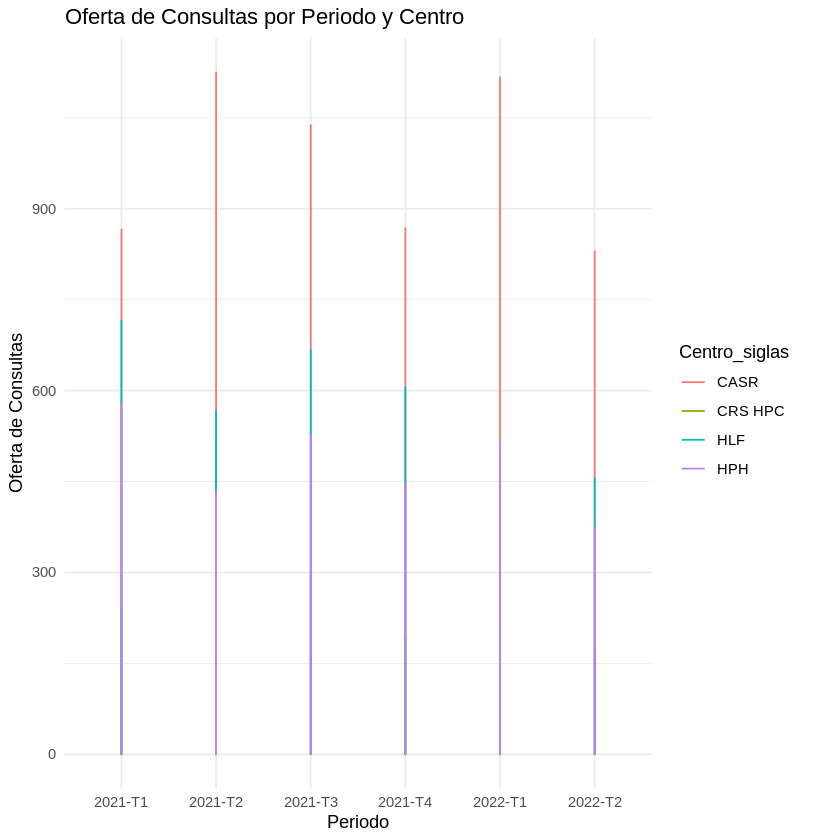

In [6]:
# Veamos que necesitamos procesar los datos para visualizarlos adecuadamente
# prompt: genera un gráfico de Oferta_consultas por periodo desglosado por Centro_siglas

# Generar el gráfico estático
ggplot_fig <- ggplot(cubo, aes(x = Periodo, y = Oferta_consultas, color = Centro_siglas)) +
  #en base a la estética (aes= eje x, y & el color de cada línea según las siglas del centro) definida, definimos que añadiremos una linea (geom_line)
  geom_line() +
  #definimos las etiquetas de los ejes y el títulod el gráfico
  labs(title = "Oferta de Consultas por Periodo y Centro",
       x = "Periodo",
       y = "Oferta de Consultas") +
  theme_minimal() #aplicamos una visualización con temática minimalista
#imprimimos el gráfico alojado
ggplot_fig

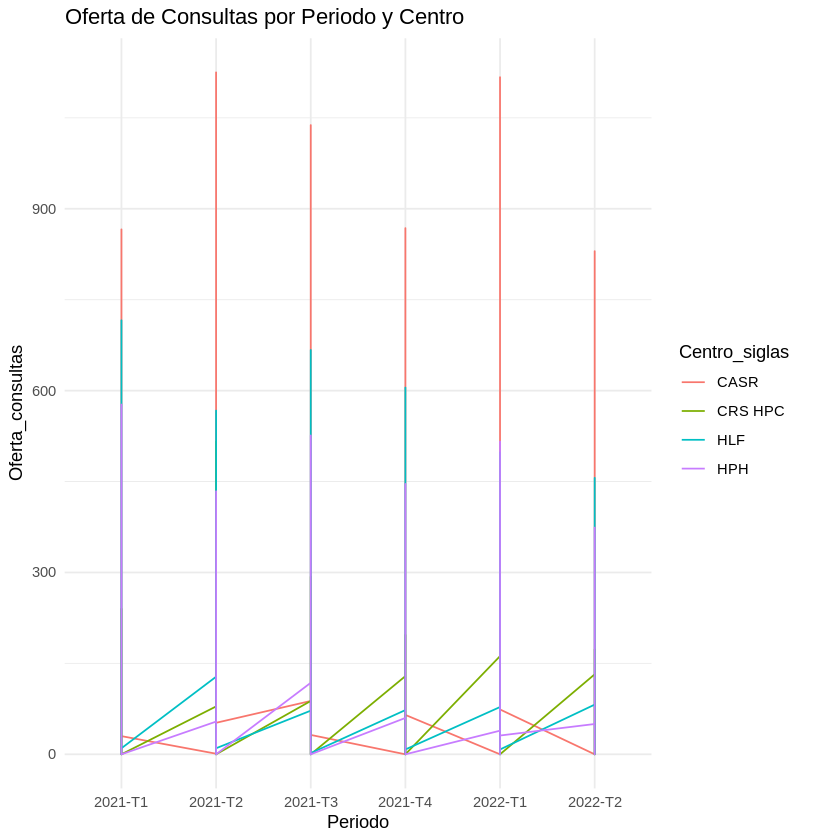

In [7]:
#Así quedaría como en el ejemplo de python (ahora agregamos el argumento, "agrupar por"(group))
ggplot(cubo, aes(x = Periodo, y = Oferta_consultas, color = Centro_siglas, group = Centro_siglas)) +
  geom_line() +
  ggtitle("Oferta de Consultas por Periodo y Centro") +
  theme_minimal()

## 🏁 Discusión
¿Porqué se ve así la serie de tiempo *Oferta_consultas*?

`summarise()` has grouped output by 'Periodo'. You can override using the
`.groups` argument.


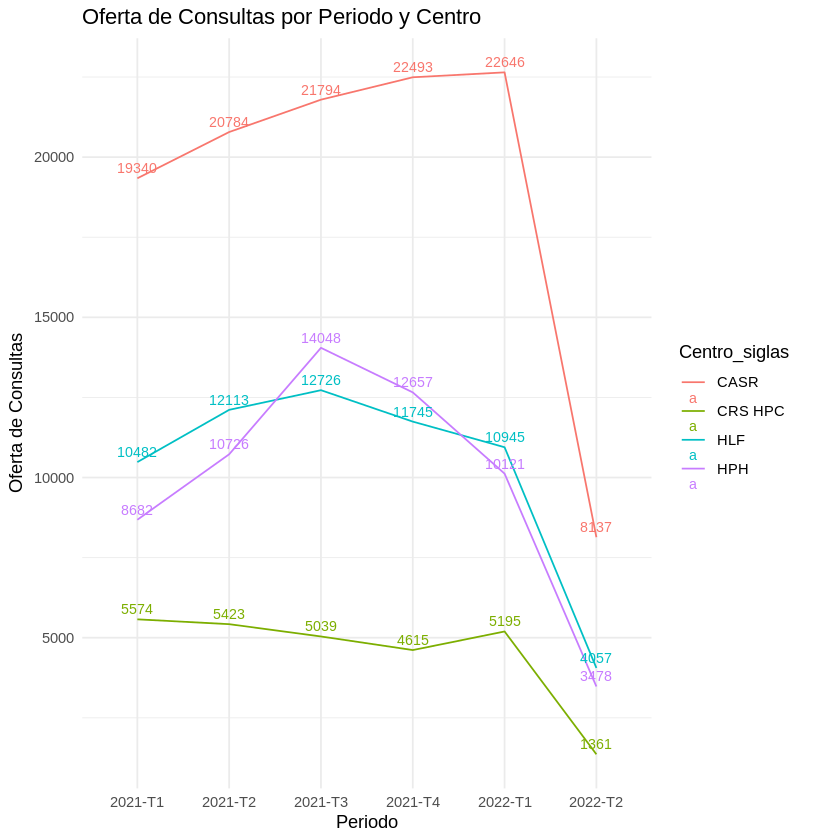

In [8]:
cubo%>%
  #agrupamos por periodo y centro
  dplyr::group_by(Periodo, Centro_siglas)%>%
  #resummimos para cada combinación de periodo y centro, una suma de todas las consultas en oferta (incluimos el argumento para ignorar/saltar NAs o valores inválidos, si hubiera)
  dplyr::summarise(Oferta_consultas=sum(Oferta_consultas, na.rm=T))%>%
    #en base a esta transformación, generamos el gráfico
ggplot(aes(x = Periodo, y = Oferta_consultas, color = Centro_siglas, group = Centro_siglas)) +
  geom_line() +
  #definimos las etiquetas de los ejes y el títulod el gráfico
  labs(title = "Oferta de Consultas por Periodo y Centro",
       x = "Periodo",
       y = "Oferta de Consultas") +
  theme_minimal()+
  # Añadimos etiquetas para cada punto
  geom_text(aes(label = Oferta_consultas), vjust = -0.5, size = 3)

## Gráfico interactivo

Para explorar las series, en vez de generar un script y un extracto para visualizar cada serie, podemos crear una función que reciba como parámetro la serie que queremos visualizar.

In [9]:
# Generamos una función que toma como parámetro el nombre de la serie:
# Función para graficar series de datos
# y: Especialidad, o nombre de la columna a analizar como texto (por ejemplo: 'Consultas_producidas', 'Consultas_inasistencia', 'Oferta_consultas', 'Consultas_solicitadas', 'Lista_espera_inicial')
graficar_serie <- function(y) {

  # Agrupar los datos por Periodo y Centro_siglas
  cubo %>%
    dplyr::group_by(Periodo, Centro_siglas) %>%
    # Resumir los datos: sumar los valores de la columna especificada, ignorando NAs
    dplyr::summarise(
      suma_y = sum(.data[[y]], na.rm = TRUE),
      .groups = "drop" # Evita mensajes de agrupación posterior
    ) %>%
    # Generar el gráfico
    ggplot(aes(x = Periodo, y = suma_y, color = Centro_siglas, group = Centro_siglas)) +
    geom_line() + # Agregar líneas para cada Centro_siglas
    # Etiquetas de los ejes y título del gráfico
    labs(
      #concatenamos el título, reemplazando "_" por " " (espacio) para la variable de interés y que no se vea fea
      title = paste("Gráfico de", gsub("_"," ",y), "por Periodo y Centro"),
      x = "Periodo",
      y = y
    ) +
    theme_minimal() + # Aplicar un tema minimalista
    # Añadir etiquetas en cada punto con los valores de la serie
    geom_text(aes(label = suma_y), vjust = -0.5, size = 3)
}

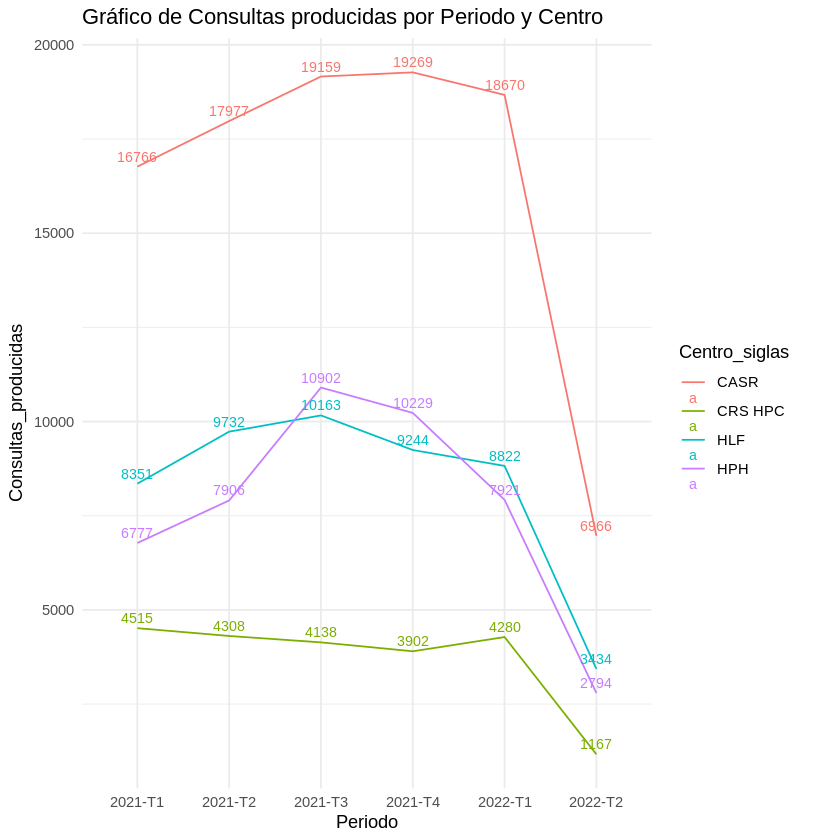

In [10]:
# Ejecutamos la función

graficar_serie('Consultas_producidas')

In [11]:
# También podemos agregar un parámetro que permita filtrar por especialidad
graficar_serie_esp <- function(esp=NULL, y) {
  # Tenemos 2 argumentos o inputs en esta función= y (métrica) + esp (especialidad)
  # Agrupar los datos por Periodo y Centro_siglas
  cubo %>%
    # Filtrar por especialidad si se especifica
    {
      #se especifica esp en la función?
      if (!is.null(esp)) {
        #si es distinto a nulo, entonces se filtra por él
        dplyr::filter(., Especialidad == esp)
      } else {
        #de lo contrario, se sigue utilizando la base cubo como está
        .
      }
    } %>%
    dplyr::group_by(Periodo, Centro_siglas) %>%
    # Resumir los datos: sumar los valores de la columna especificada, ignorando NAs
    dplyr::summarise(
      suma_y = sum(.data[[y]], na.rm = TRUE),
       # Si la variable serie es igual a 'Lista_espera_inicial', divide los valores de esa columna entre 3.
       # si  # métrica no es aditiva al agregar por trimestre (3 meses)
      .groups = "drop" # Evita mensajes de agrupación posterior
    ) %>%
    # Generar el gráfico
    ggplot(aes(x = Periodo, y = suma_y, color = Centro_siglas, group = Centro_siglas)) +
    geom_line() + # Agregar líneas para cada Centro_siglas
    # Etiquetas de los ejes y título del gráfico
    labs(
      #concatenamos el título, reemplazando "_" por " " (espacio) para la variable de interés y que no se vea fea
      #Ahora agregamos especialidad
      title = paste(gsub("_"," ",y), "por Periodo y Centro (",esp,")"),
      x = "Periodo",
      y = y
    ) +
    theme_minimal() + # Aplicar un tema minimalista
    # Añadir etiquetas en cada punto con los valores de la serie
    geom_text(aes(label = suma_y), vjust = -0.5, size = 3)
}

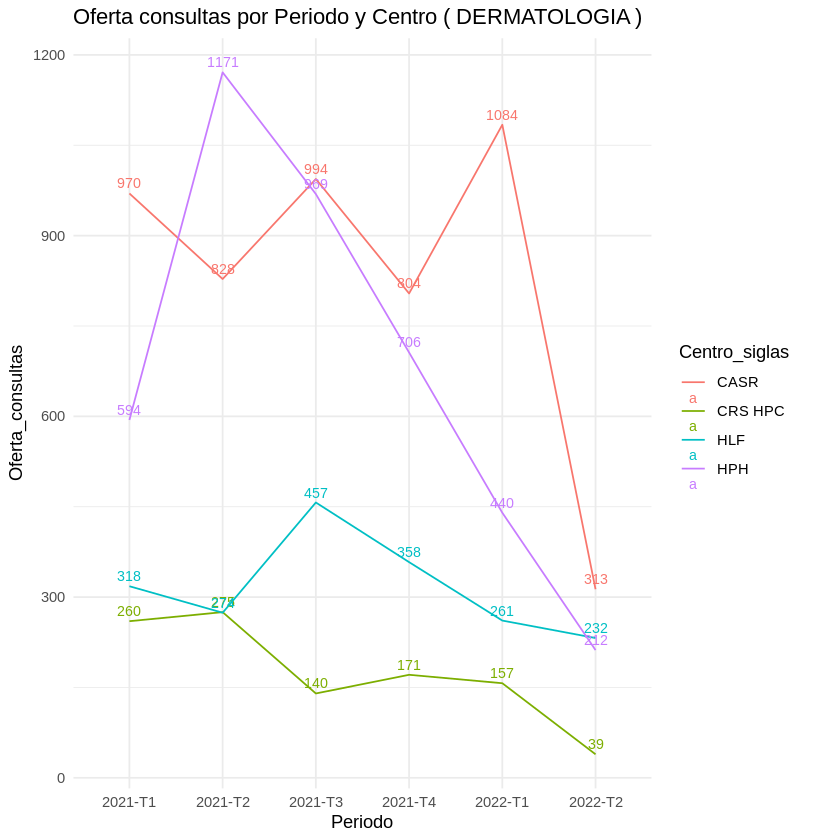

In [12]:
# Ejecutamos la función para un caso
# definimos el argumento esp, para que por descarte el otro quede como y
graficar_serie_esp('Oferta_consultas', esp='DERMATOLOGIA')

## 🍎 Desafíos

1. Explore otras series de tiempo cambiando los parámetros serie y/o especialidad.
2. Agregue un parámetro a la función *graficar_serie* que permita filtrar los datos para un año específico

In [15]:
graficar_serie <- function(y, esp = NULL, anio = NULL) {

  # Validar que la variable exista
  if (!y %in% names(cubo)) {
    stop(paste("La variable", y, "no existe en el cubo"))
  }

  df <- cubo %>%
    # Filtro por especialidad si se indica
    {
      if (!is.null(esp)) filter(., Especialidad == esp) else .
    } %>%
    # Filtro por año si se indica
    {
      if (!is.null(anio)) filter(., Año == anio) else .
    }

  # Si no quedan datos, avisar
  if (nrow(df) == 0) {
    stop("No hay datos para esa combinación de filtros")
  }

  df_sum <- df %>%
    group_by(Periodo, Centro_siglas) %>%
    summarise(
      valor = sum(.data[[y]], na.rm = TRUE),
      .groups = "drop"
    )

  # Ajuste para métrica no aditiva
  if (y == "Lista_espera_inicial") {
    df_sum <- df_sum %>% mutate(valor = valor / 3)
  }

  ggplot(df_sum, aes(
    x = Periodo,
    y = valor,
    color = Centro_siglas,
    group = Centro_siglas
  )) +
    geom_line() +
    geom_point() +
    labs(
      title = paste(
        gsub("_", " ", y),
        "por Periodo y Centro",
        if (!is.null(esp)) paste("(", esp, ")") else "",
        if (!is.null(anio)) paste("-", anio) else ""
      ),
      x = "Periodo",
      y = y
    ) +
    theme_minimal()
}


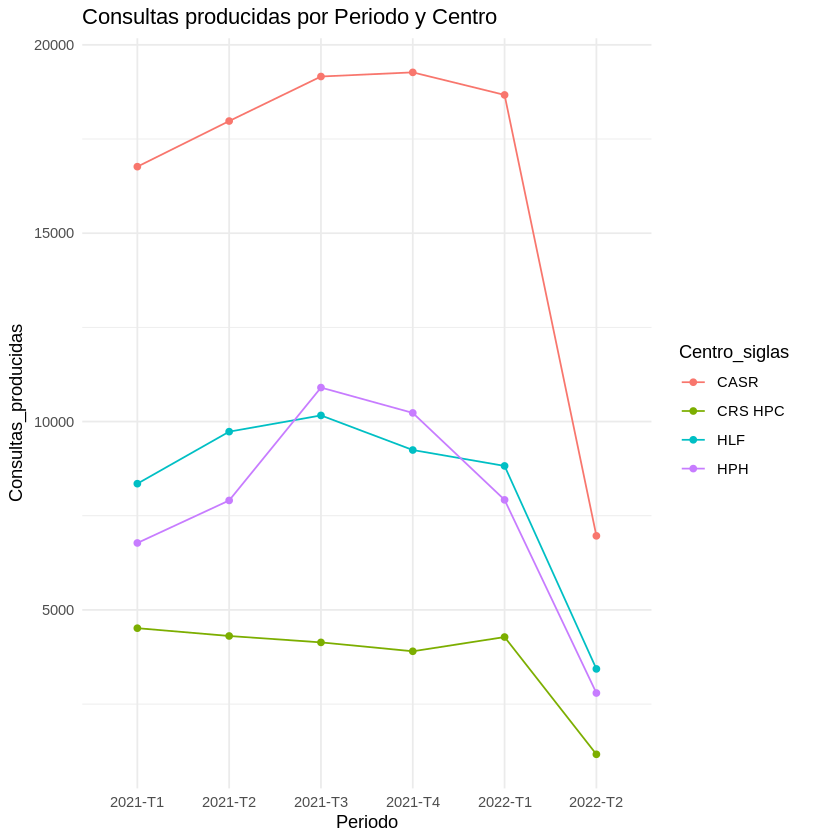

In [16]:
graficar_serie("Consultas_producidas")


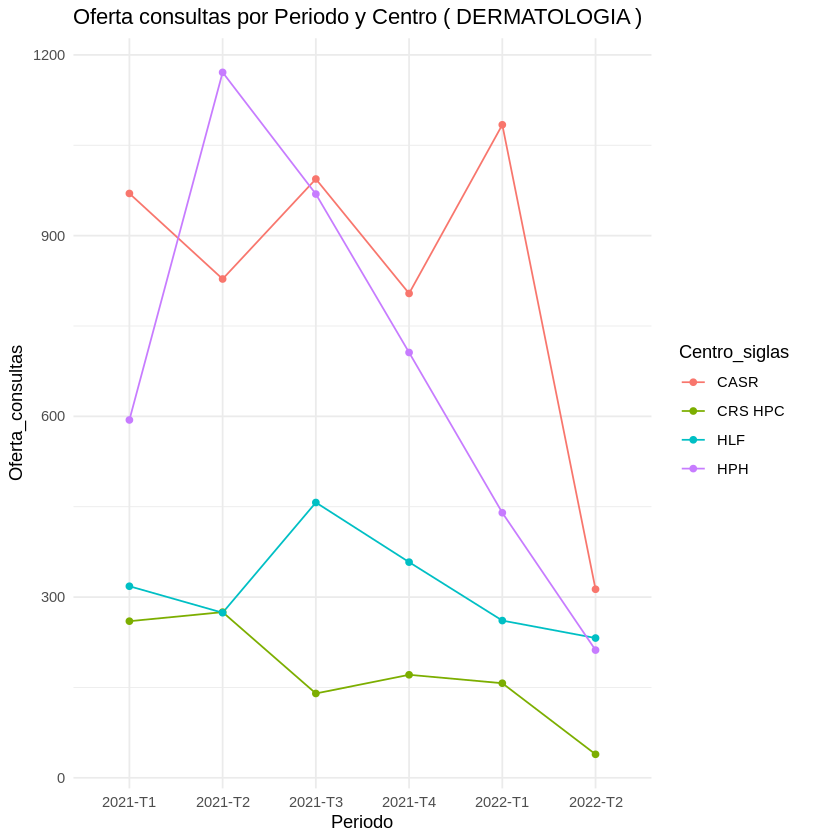

In [17]:
graficar_serie(
  y   = "Oferta_consultas",
  esp = "DERMATOLOGIA"
)


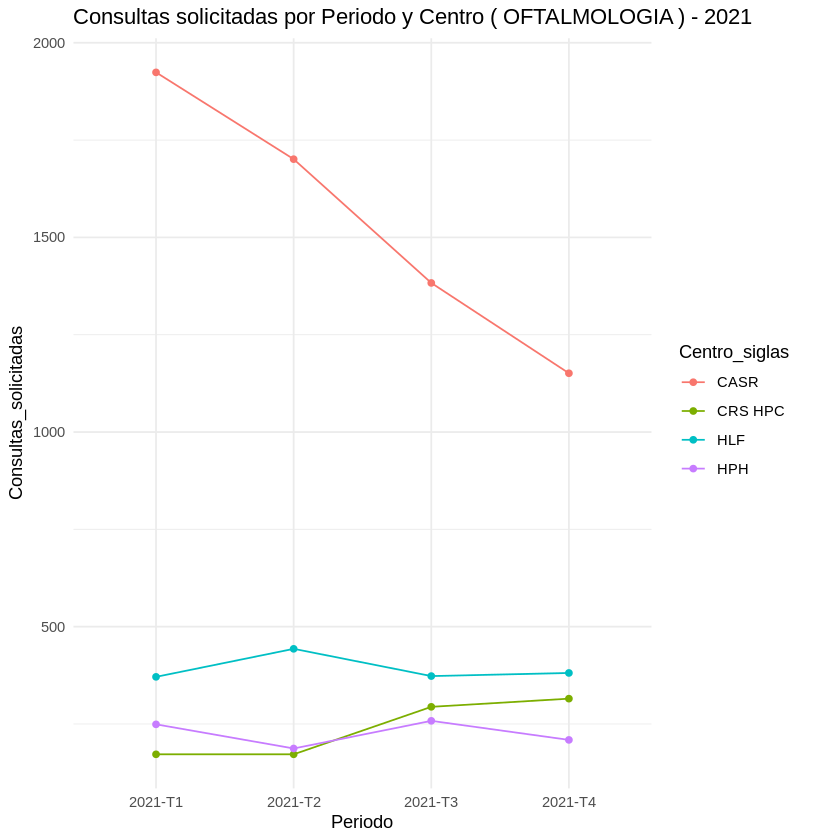

In [18]:
graficar_serie(
  y    = "Consultas_solicitadas",
  esp  = "OFTALMOLOGIA",
  anio = 2021
)


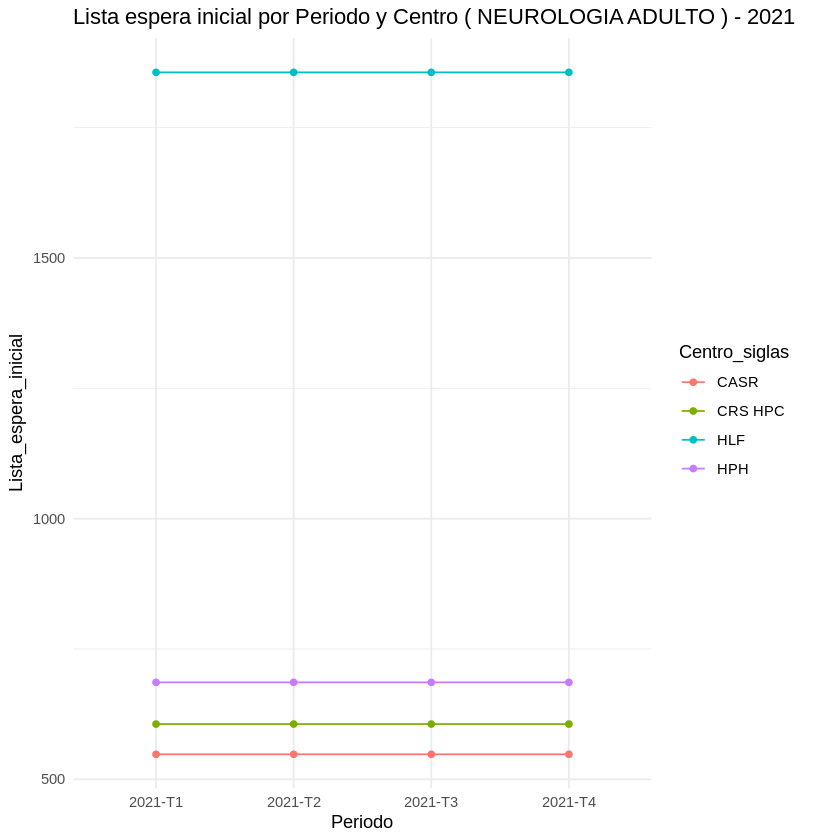

In [19]:
graficar_serie(
  y    = "Lista_espera_inicial",
  esp  = "NEUROLOGIA ADULTO",
  anio = 2021
)


## Desglosar por establecimiento

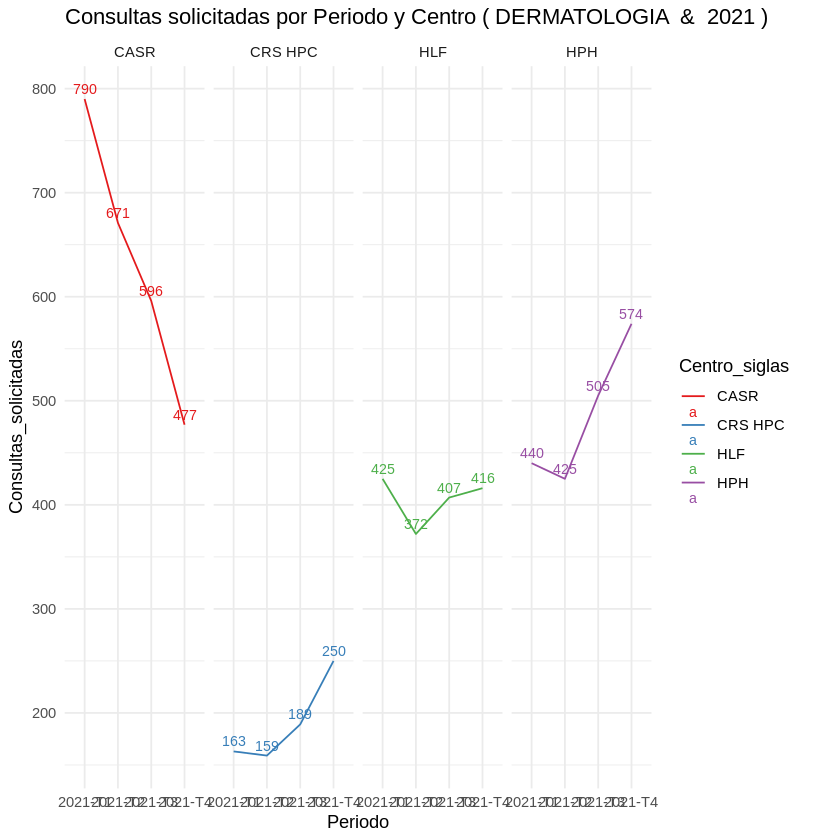

In [20]:
# También podemos agregar un parámetro que permita filtrar por especialidad
graficar_serie_esp_facet <- function(esp=NULL, y, anio= NULL) {
  # Tenemos 2 argumentos o inputs en esta función= y (métrica) + esp (especialidad)
  # Agrupar los datos por Periodo y Centro_siglas
  cubo %>%
        dplyr::filter(Especialidad == esp) %>%
        dplyr::filter(Año == anio) %>%
    dplyr::group_by(Periodo, Centro_siglas) %>%
    # Resumir los datos: sumar los valores de la columna especificada, ignorando NAs
    dplyr::summarise(
      suma_y = sum(.data[[y]], na.rm = TRUE),
       # Si la variable serie es igual a 'Lista_espera_inicial', divide los valores de esa columna entre 3.
       # si  # métrica no es aditiva al agregar por trimestre (3 meses)
      .groups = "drop" # Evita mensajes de agrupación posterior
    ) %>%
    # Generar el gráfico
    ggplot(aes(x = Periodo, y = suma_y, group = 1, color= Centro_siglas)) +
    geom_line() +
    # Etiquetas de los ejes y título del gráfico
    labs(
      #concatenamos el título, reemplazando "_" por " " (espacio) para la variable de interés y que no se vea fea
      #Ahora agregamos especialidad
      title = paste(gsub("_"," ",y), "por Periodo y Centro (", esp, " & ", anio,")"),
      x = "Periodo",
      y = y
    ) +
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # trocear por centro
    facet_grid(~Centro_siglas)+
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # añadir paleta de colores por cada línea con una paleta de colores predeterminada
    scale_color_brewer(palette = "Set1") + # Cambiar colores para líneas y puntos según centros
    theme_minimal() + # Aplicar un tema minimalista
    # Añadir etiquetas en cada punto con los valores de la serie
    geom_text(aes(label = suma_y), vjust = -0.5, size = 3)+
    # Añadimos etiquetas por cada 100 unidades, partiendo desde 0 y terminando en 800 unidades, para que se parezca al gráfico de Python
    scale_y_continuous(breaks = seq(0, 800, by = 100))
}
graficar_serie_esp_facet(y='Consultas_solicitadas', esp='DERMATOLOGIA', anio=2021)

## 🏁 Discusión

1. ¿Qué ventajas y desventajas tiene generar las visualizaciones con un lenguaje de programación vs. realizarlos con Excel?
2. ¿Qué ventajas y desventajas tiene analizar los datos utilizando funciones como *graficar_series*?

# Graficar brechas

In [21]:
graficar_brechas <- function(especialidad, anio) {
  # Filtrar los datos por especialidad y año
  df <- cubo %>%
    dplyr::filter(Especialidad == especialidad, Año == anio) %>%
    # Agrupar por Periodo
    dplyr::group_by(Periodo) %>%
    # Sumar las métricas
    dplyr::summarise(
      Oferta_consultas = sum(Oferta_consultas, na.rm = TRUE),
      Consultas_solicitadas = sum(Consultas_solicitadas, na.rm = TRUE),
      Lista_espera_inicial = sum(Lista_espera_inicial, na.rm = TRUE),
      .groups = "drop"
    ) %>%
    # Ajustar Lista_espera_inicial por trimestre
    dplyr::mutate(
      Lista_espera_inicial = Lista_espera_inicial / 3,
      Demanda_acumulada = cumsum(Consultas_solicitadas),
      Oferta_acumulada = cumsum(Oferta_consultas)
    )

  # Generar el gráfico
  ggplot(df) +
    #Group = 1: Para mantener el orden de los datos en las áreas (porque geom_area requiere continuidad en los valores de x).
    # Área para Lista_espera_inicial: área sombreada con azul claro, con transparencia al 50%
    geom_area(aes(x = Periodo, y = Lista_espera_inicial, group= 1), alpha = 0.5, fill ="lightblue") +
    # Área para Demanda_acumulada: área sombreada con verde claro, con transparencia al 50%
    geom_area(aes(x = Periodo, y = Demanda_acumulada+Lista_espera_inicial, group= 1), alpha = 0.5, fill ="lightgreen") +
    # Línea para Oferta_acumulada: línea coloreada con azul oscuro y grosor de 1
    geom_line(aes(x = Periodo, y = Oferta_acumulada, group= 1), linewidth = 1, color = "darkblue") +
    # Punto para Oferta_acumulada: punto coloreado con azul oscuro y grosor de 2
    geom_point(aes(x = Periodo, y = Oferta_acumulada, group= 1), color="darkblue", size = 2) +
    # Etiquetas del gráfico
    labs(
      title = paste("Brechas por Periodo (", especialidad, " al ",anio, ")", sep = ""),
      x = "Periodo",
      y = "Cantidad",
      fill = "Métricas",
      color = "Métricas",
      #Añadimos una nota explicativa a falta de una leyenda, e introducimos un salto de línea (\n) para  poder visualizarla
      caption= "Área azul claro= Lista espera inicial; Área verde claro= Demanda acumulada;\nOferta acumulada= Punto azul oscuro"
    ) +
    theme_minimal()
}


In [22]:
unique(cubo$Especialidad)

[1] "ANESTESIOLOGIA"                                                    
 [2] "CARDIOLOGIA"                                                       
 [3] "CIRUGIA GENERAL"                                                   
 [4] "CIRUGIA DE CABEZA, CUELLO Y MAXILOFACIAL"                          
 [5] "CIRUGIA CARDIOVASCULAR"                                            
 [6] "CIRUGIA DE TORAX"                                                  
 [7] "CIRUGIA PLASTICA Y REPARADORA"                                     
 [8] "CIRUGIA PEDIATRICA"                                                
 [9] "CIRUGIA VASCULAR PERIFERICA"                                       
[10] "COLOPROCTOLOGIA"                                                   
[11] "DERMATOLOGIA"                                                      
[12] "DIABETOLOGIA"                                                      
[13] "ENDOCRINOLOGIA ADULTO"                                             
[14] "ENDOCRINOLOGIA PEDIATRICA"                                         
[15] "ENFERMEDADES RESPIRATORIAS DEL ADULTO (BRONCOPULMONAR)"            
[16] "ENFERMEDADES RESPIRATORIAS PEDIATRICAS (BRONCOPULMONAR PEDIATRICO)"
[17] "GASTROENTEROLOGIA ADULTO"                                          
[18] "GASTROENTEROLOGIA PEDIATRICA"                                      
[19] "GENETICA CLINICA"                                                  
[20] "GERIATRIA"                                                         
[21] "GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA"                       
[22] "HEMATOLOGIA"                                                       
[23] "IMAGENOLOGÍA"                                                      
[24] "INFECTOLOGIA"                                                      
[25] "INMUNOLOGIA"                                                       
[26] "MEDICINA FAMILIAR"                                                 
[27] "MEDICINA FISICA Y REHABILITACION (FISIATRIA ADULTO)"               
[28] "MEDICINA INTERNA"                                                  
[29] "MEDICINA NUCLEAR"                                                  
[30] "NEFROLOGIA ADULTO"                                                 
[31] "NEFROLOGIA PEDIATRICO"                                             
[32] "NEONATOLOGIA"                                                      
[33] "NEUROCIRUGIA"                                                      
[34] "NEUROLOGIA ADULTO"                                                 
[35] "NEUROLOGIA PEDIATRICA"                                             
[36] "OFTALMOLOGIA"                                                      
[37] "ONCOLOGIA MEDICA"                                                  
[38] "OTORRINOLARINGOLOGIA"                                              
[39] "PEDIATRIA"                                                         
[40] "PSIQUIATRIA ADULTO"                                                
[41] "PSIQUIATRIA PEDIATRICA Y DE LA ADOLESCENCIA"                       
[42] "RADIOTERAPIA ONCOLOGICA"                                           
[43] "REUMATOLOGIA"                                                      
[44] "TRAUMATOLOGIA Y ORTOPEDIA"                                         
[45] "UROLOGIA"                                                          
[46] "CARDIOLOGIA PEDIATRICA"                                            
[47] "CIRUGIA DIGESTIVA"                                                 
[48] "CIRUGIA PLASTICA Y REPARADORA PEDIATRICA"                          
[49] "GINECOLOGIA"                                                       
[50] "HEMATO-ONCOLOGIA PEDIATRICA"                                       
[51] "INFECTOLOGIA PEDIATRICA"                                           
[52] "MEDICINA FAMILIAR DEL NIÑO"                                        
[53] "MEDICINA FISICA Y REHABILITACION PEDIATRICA (FISIATRIA PEDIATRICA)"
[54] "NUTRIOLOGO"                                                        
[55] 

Ignoring unknown labels:
• fill : "Métricas"
• colour : "Métricas"


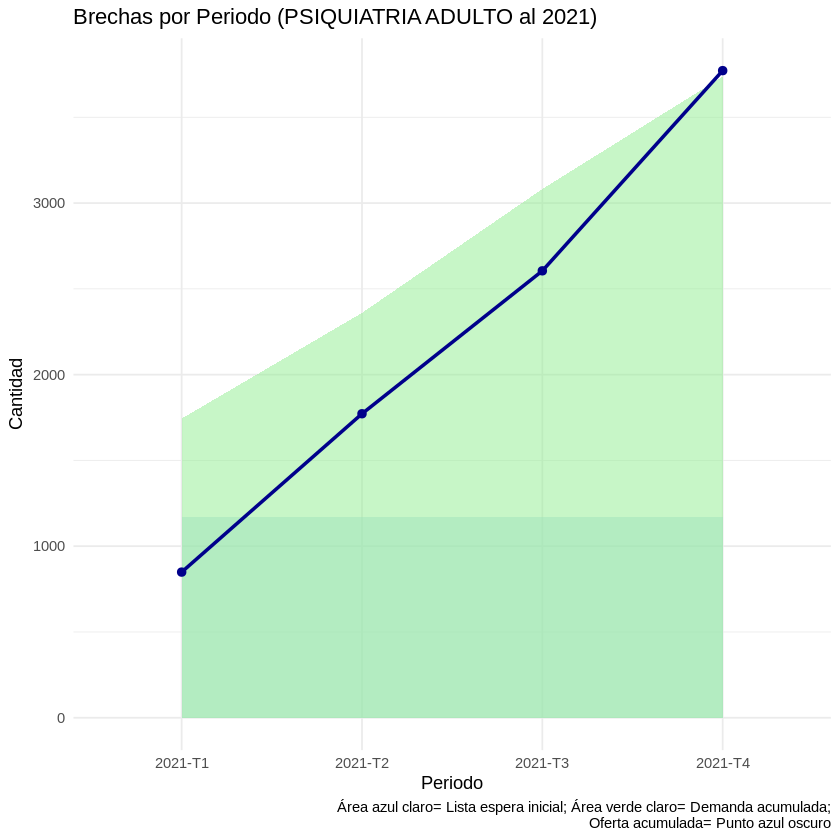

In [23]:
graficar_brechas('PSIQUIATRIA ADULTO',2021)

In [24]:
graficar_brechas_centros_ggplot <- function(especialidad, anio) {

  # 1. Filtrar y Preparar Datos
  df <- cubo %>%
    dplyr::filter(Especialidad == especialidad, Año == anio) %>%
    # CAMBIO: Usamos 'Periodo' en lugar de 'Trimestre'
    dplyr::group_by(Periodo, Centro_siglas) %>%
    dplyr::summarise(
      Oferta_consultas      = sum(Oferta_consultas, na.rm = TRUE),
      Consultas_solicitadas = sum(Consultas_solicitadas, na.rm = TRUE),
      Lista_espera_inicial  = dplyr::first(Lista_espera_inicial),
      .groups = "drop"
    ) %>%
    dplyr::group_by(Centro_siglas) %>%
    dplyr::mutate(
      Demanda_acumulada = cumsum(Consultas_solicitadas),
      Oferta_acumulada  = cumsum(Oferta_consultas)
    ) %>%
    dplyr::ungroup()

  # 2. Transformar a formato largo para ggplot
  df_long <- df %>%
    dplyr::select(Periodo, Centro_siglas, Lista_espera_inicial, Demanda_acumulada, Oferta_acumulada) %>%
    tidyr::pivot_longer(
      cols = c("Lista_espera_inicial", "Demanda_acumulada", "Oferta_acumulada"),
      names_to = "Variable",
      values_to = "Valor"
    )

  # 3. Crear el gráfico
  g <- ggplot(df_long, aes(x = Periodo, y = Valor)) +

    # Áreas apiladas (Lista de espera y Demanda)
    geom_area(
      data = dplyr::filter(df_long, Variable %in% c("Lista_espera_inicial", "Demanda_acumulada")),
      aes(fill = Variable, group = Variable),
      position = "stack",
      alpha = 0.7
    ) +

    # Línea para la Oferta (encima de las áreas)
    geom_line(
      data = dplyr::filter(df_long, Variable == "Oferta_acumulada"),
      aes(color = Variable, group = 1),
      linewidth = 1.2 # Nota: 'size' está deprecado en ggplots nuevos, se usa 'linewidth'
    ) +

    # Puntos para la Oferta
    geom_point(
      data = dplyr::filter(df_long, Variable == "Oferta_acumulada"),
      aes(color = Variable),
      size = 2
    ) +

    # Facet Grid (equivalente a make_subplots)
    facet_wrap(~Centro_siglas, nrow = 1, scales = "fixed") +

    # Colores manuales
    scale_fill_manual(values = c(
      "Lista_espera_inicial" = "darkviolet",
      "Demanda_acumulada" = "violet"
    )) +
    scale_color_manual(values = c(
      "Oferta_acumulada" = "red"
    )) +

    # Estilos
    labs(
      title = paste("Brechas por Periodo (", especialidad, anio, ")"),
      y = "Cantidad",
      x = "Periodo",
      fill = "Demanda",
      color = "Oferta"
    ) +
    theme_minimal() +
    theme(
      legend.position = "bottom",
      strip.text = element_text(face = "bold", size = 12),
      axis.text.x = element_text(angle = 45, hjust = 1) # Rotar etiquetas si son largas
    )

  return(g)
}

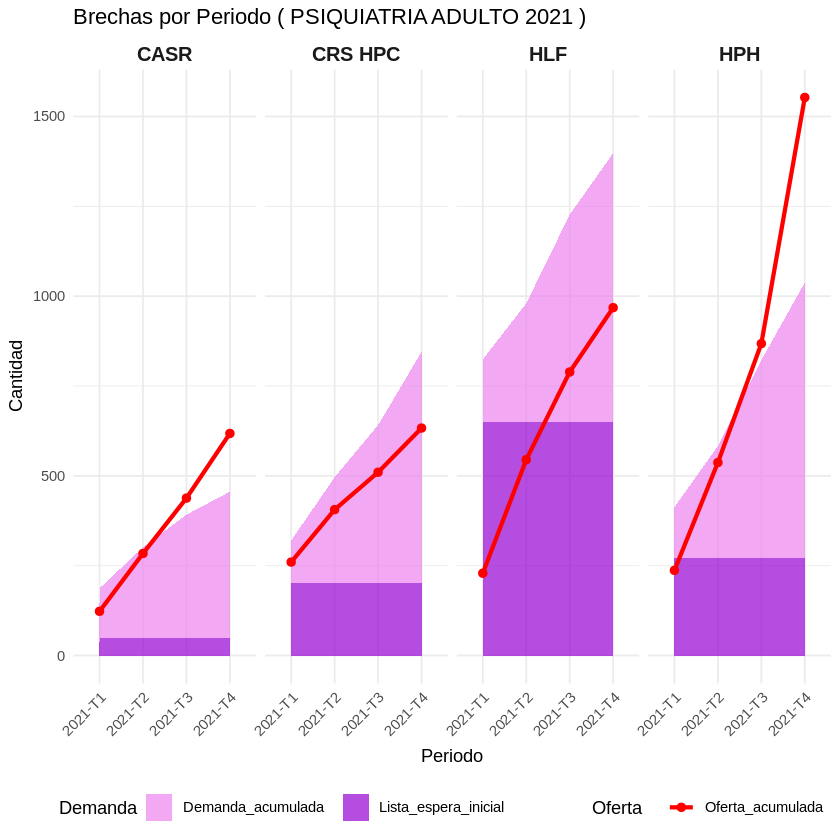

In [25]:
graficar_brechas_centros_ggplot("PSIQUIATRIA ADULTO", 2021)

Finalmente generamos una función para desglosar las brechas por establecimiento

Ignoring unknown labels:
• fill : "Métricas"
• colour : "Métricas"


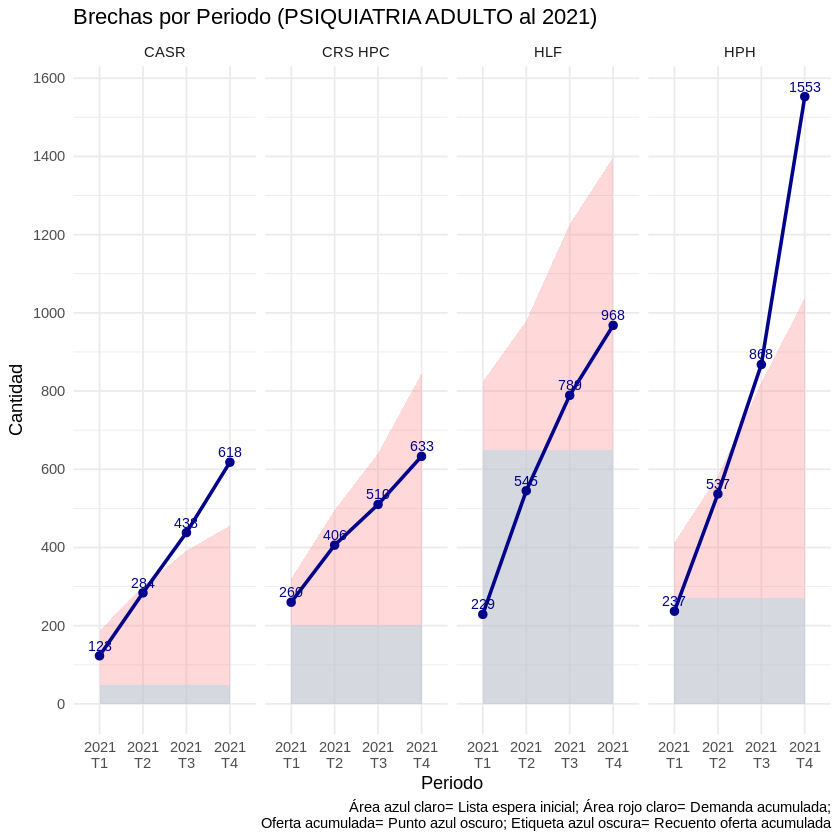

In [26]:
graficar_brechas_centro <- function(especialidad, anio) {
  # Filtrar los datos por especialidad y año
  cubo %>%
    dplyr::filter(Especialidad == especialidad, Año == anio) %>%
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # Agrupar por Periodo y Centro
    dplyr::group_by(Periodo, Centro_siglas) %>%
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # Sumar las métricas
    dplyr::summarise(
      Oferta_consultas = sum(Oferta_consultas, na.rm = TRUE),
      Consultas_solicitadas = sum(Consultas_solicitadas, na.rm = TRUE),
      Lista_espera_inicial = sum(Lista_espera_inicial, na.rm = TRUE),
      .groups = "drop"
    ) %>%
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # No utilizamos agrupación por unidades ni periodos para la lista de espera inicial, por su definición
    dplyr::mutate(
    # Ajustar Lista_espera_inicial por trimestre
      Lista_espera_inicial = Lista_espera_inicial / 3)%>%
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    dplyr::group_by(Centro_siglas)%>%
    # En cambio, sí generamos las demandas y ofertas acumuladas por centro. De lo contrario las tendríamos infladas porque representarían al conjunto de centros de la base
    dplyr::mutate(
      # Va acumulando por trimestre
      Demanda_acumulada = cumsum(Consultas_solicitadas),
      Oferta_acumulada = cumsum(Oferta_consultas)
    )%>%
    dplyr::ungroup()%>%
    # Reemplazamos el guíon de periodo por un salto de línea, para mayor claridad en el gráfico
    dplyr::mutate(Periodo=gsub("-", "\n", Periodo))%>%
  # Generar el gráfico
  ggplot() +
    #Group = 1: Para mantener el orden de los datos en las áreas (porque geom_area requiere continuidad en los valores de x).
    # Área para Demanda_acumulada: área sombreada con rojo claro (#FF7F7F), con transparencia al 50%. Para ello sumamos la lista de espera inicial a la demanda, para apilarla
    geom_area(aes(x = Periodo, y = Demanda_acumulada+Lista_espera_inicial, group= 1), alpha = 0.3, fill ="#FF7F7F") +
    # Área para Lista_espera_inicial: área sombreada con azul claro, con transparencia al 50%
    geom_area(aes(x = Periodo, y = Lista_espera_inicial, group= 1), alpha = 0.5, fill ="lightblue") +
    # Línea para Oferta_acumulada: línea coloreada con azul oscuro y grosor de 1
    geom_line(aes(x = Periodo, y = Oferta_acumulada, group= 1), linewidth = 1, color = "darkblue") +
    # Punto para Oferta_acumulada: punto coloreado con azul oscuro y grosor de 2
    geom_point(aes(x = Periodo, y = Oferta_acumulada, group= 1), color="darkblue", size = 2) +
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # Segmentamos los gráficos por centro
    facet_grid(~Centro_siglas)+
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # Añadimos etiquetas por cada 200 unidades, partiendo desde 0 y terminando en 1600 unidades, para que se parezca al gráfico de Python
    scale_y_continuous(breaks = seq(0, 1600, by = 200)) +
    #_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_
    # Etiquetas del gráfico
    labs(
      title = paste("Brechas por Periodo (", especialidad, " al ",anio, ")", sep = ""),
      x = "Periodo",
      y = "Cantidad",
      fill = "Métricas",
      color = "Métricas",
      #Añadimos una nota explicativa a falta de una leyenda, e introducimos un salto de línea (\n) para  poder visualizarla
      caption= "Área azul claro= Lista espera inicial; Área rojo claro= Demanda acumulada;\nOferta acumulada= Punto azul oscuro; Etiqueta azul oscura= Recuento oferta acumulada"
    ) +
    theme_minimal()+
    # Añadimos etiquetas para cada punto de la oferta
    geom_text(aes(x = Periodo, y = Oferta_acumulada, group= 1,label = Oferta_acumulada), color="darkblue", vjust = -0.5, size = 3)
}

graficar_brechas_centro('PSIQUIATRIA ADULTO',2021)

# Extra:
En R, en general trabajamos con bases de datos en formato largo, en que en una columna se agrupan los valores, y cada fila es la combinación de la especialidad, centro, año y tipo de métrica.

In [27]:
graficar_brechas_centro_long <- function(especialidad, anio) {
  # Filtrar los datos por especialidad y año
cubo %>%
    dplyr::filter(Especialidad == especialidad, Año == anio) %>%
    dplyr::group_by(Periodo, Centro_siglas) %>%
    dplyr::summarise(
      Oferta_consultas = sum(Oferta_consultas, na.rm = TRUE),
      Consultas_solicitadas = sum(Consultas_solicitadas, na.rm = TRUE),
      Lista_espera_inicial = sum(Lista_espera_inicial, na.rm = TRUE),
      .groups = "drop"
    ) %>%
    dplyr::mutate(
      Lista_espera_inicial = Lista_espera_inicial / 3
    ) %>%
    dplyr::group_by(Centro_siglas) %>%
    dplyr::mutate(
      Demanda_acumulada = cumsum(Consultas_solicitadas),
      Oferta_acumulada = cumsum(Oferta_consultas)
    ) %>%
    dplyr::ungroup() %>%
    #_#_#_#_#_#_#_#_#_#_#_#_
    # Reformateamos la base de datos en formato largo.
    # Generamos la columna métrica. En ella,
    tidyr::pivot_longer(
      cols = c(Lista_espera_inicial, Demanda_acumulada, Oferta_acumulada),
      names_to = "metrica",
      values_to = "value"
    ) %>%
    # Reemplazamos "_" por " " en la métrica
    dplyr::mutate(metrica= gsub("_","\n",metrica))%>%
    #_#_#_#_#_#_#_#_#_#_#_#_
    # Reemplazamos el guíon de periodo por un salto de línea, para mayor claridad en el gráfico
    dplyr::mutate(Periodo=gsub("-", "\n", Periodo), levels = gsub("-", "\n", Periodo))%>%
    #_#_#_#_#_#_#_#_#_#_#_#_
  # Generar el gráfico
  ggplot() +
    geom_area(
      data = . %>% dplyr::filter(metrica %in% c("Lista\nespera\ninicial", "Demanda\nacumulada")),
      aes(x = Periodo, y = value, fill = metrica, group = metrica),
      alpha = 0.4,
      position = "stack"
    ) +
    geom_line(
      data = . %>% dplyr::filter(metrica == "Oferta\nacumulada"),
      aes(x = Periodo, y = value, group = Centro_siglas),
      linewidth = 1, color = "darkblue"
    ) +
    geom_point(
      data = . %>% dplyr::filter(metrica == "Oferta\nacumulada"),
      aes(x = Periodo, y = value, group = Centro_siglas),
      color = "darkblue", size = 2
    ) +
    geom_text(
      data = . %>% dplyr::filter(metrica == "Oferta\nacumulada"),
      aes(x = Periodo, y = value, label = value),
      color = "darkblue", vjust = -0.5, size = 3
    ) +
    facet_grid(~Centro_siglas) +
    scale_y_continuous(breaks = seq(0, 1600, by = 200)) +
    labs(
      title = paste("Brechas por Periodo (", especialidad, " al ", anio, ")", sep = ""),
      x = "Periodo",
      y = "Cantidad",
      fill = "Métricas",
      caption = "Área azul claro = Lista espera inicial; Área rojo claro = Demanda acumulada;\nOferta acumulada = Línea y puntos azul oscuro"
    ) +
    scale_fill_manual(
      values = c(
        "Lista\nespera\ninicial" = "lightblue",
        "Demanda\nacumulada" = "#FF7F7F"
      )
    ) +
    theme_minimal()
}


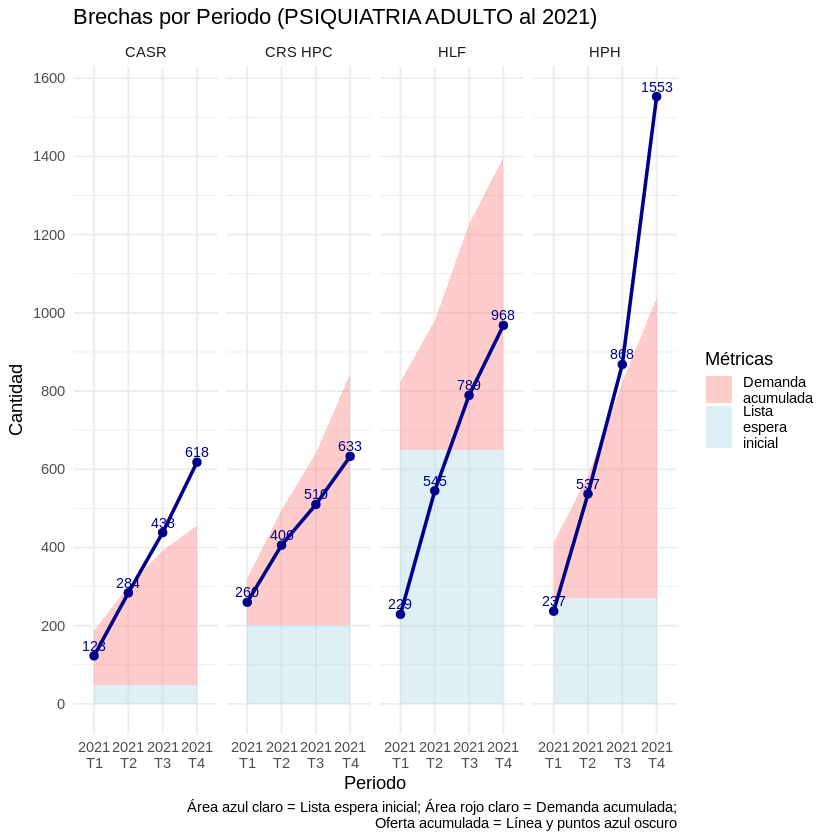

In [28]:
# Construimos el gráfico para una especialidad

graficar_brechas_centro_long('PSIQUIATRIA ADULTO', 2021)

## 🍎 Desafíos

1. Ejecute *generar_brechas_centros* con otra especialidad

2. Modifique alguna de las visualizaciones incorporando otras variables disponibles en el cubo.
2. Genere otra visualización de las brechas que le parezca interesante para contrastar la demanda y oferta.

Ignoring unknown labels:
• fill : "Métricas"
• colour : "Métricas"
Ignoring unknown labels:
• fill : "Métricas"
• colour : "Métricas"


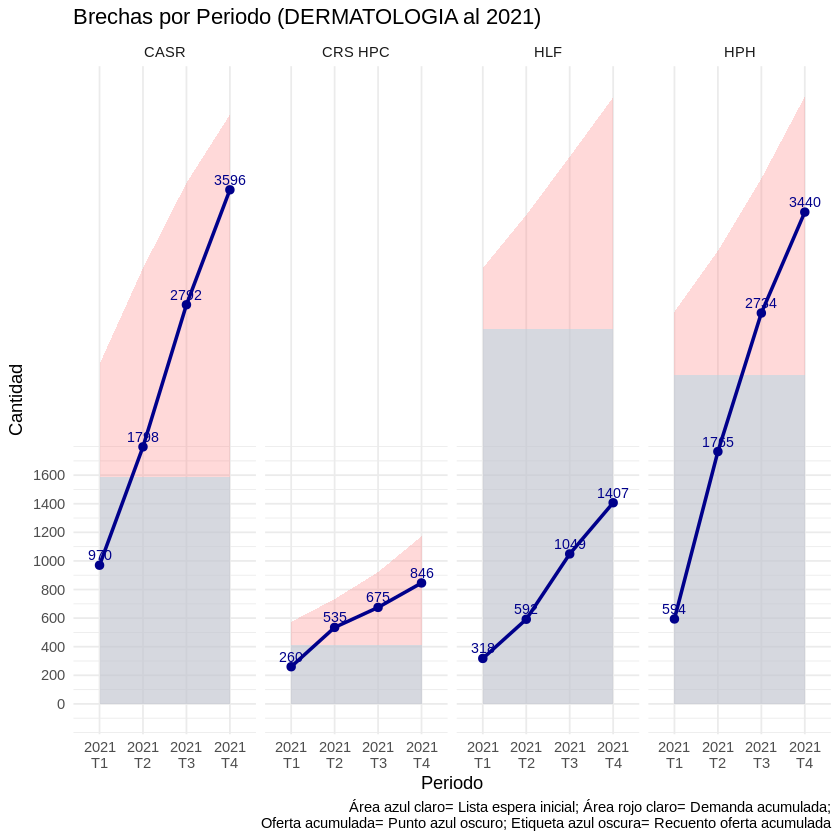

Ignoring unknown labels:
• fill : "Métricas"
• colour : "Métricas"


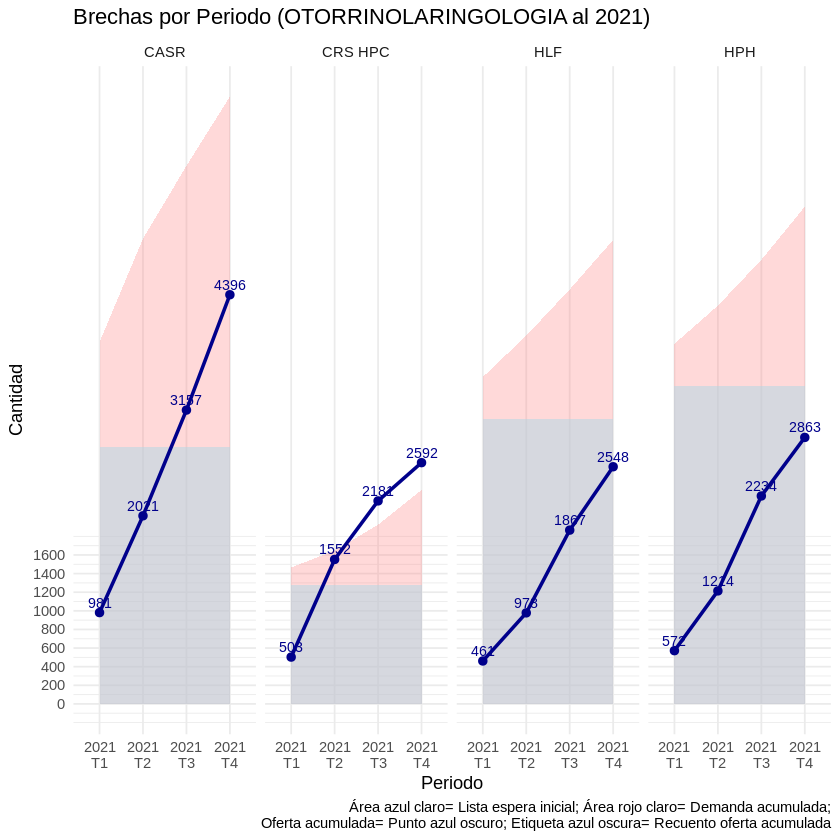

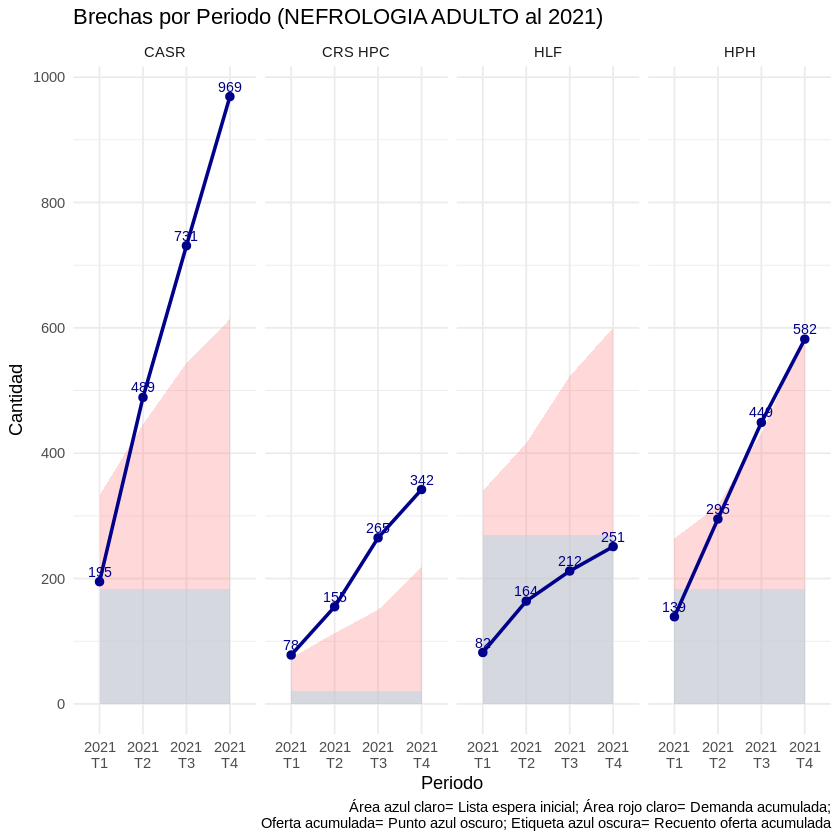

In [30]:
graficar_brechas_centro("DERMATOLOGIA", 2021)
# o por ejemplo
graficar_brechas_centro("OTORRINOLARINGOLOGIA", 2021)
# o una de alto riesgo
graficar_brechas_centro("NEFROLOGIA ADULTO", 2021)


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


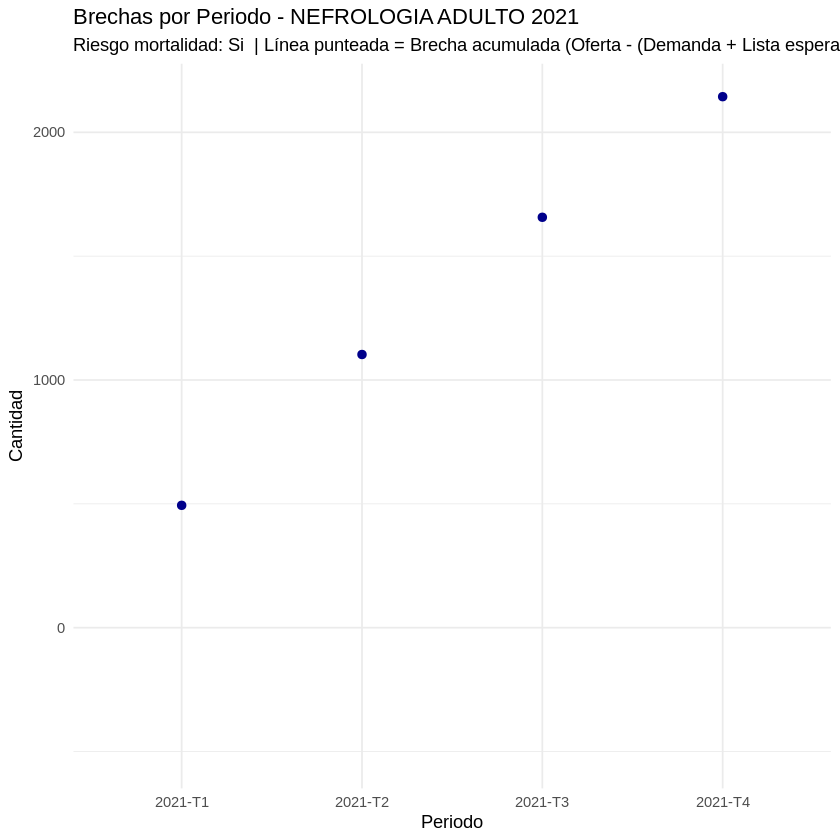

In [31]:
graficar_brechas_riesgo <- function(especialidad, anio) {

  riesgo <- cubo %>%
    filter(Especialidad == especialidad, Año == anio) %>%
    summarise(riesgo = dplyr::first(`Riesgo mortalidad`)) %>%
    pull(riesgo)

  df <- cubo %>%
    filter(Especialidad == especialidad, Año == anio) %>%
    group_by(Periodo) %>%
    summarise(
      Oferta_consultas = sum(Oferta_consultas, na.rm = TRUE),
      Consultas_solicitadas = sum(Consultas_solicitadas, na.rm = TRUE),
      Lista_espera_inicial = sum(Lista_espera_inicial, na.rm = TRUE),
      .groups = "drop"
    ) %>%
    mutate(
      Lista_espera_inicial = Lista_espera_inicial / 3,
      Demanda_acumulada = cumsum(Consultas_solicitadas),
      Oferta_acumulada = cumsum(Oferta_consultas),
      Brecha_acumulada = Oferta_acumulada - (Demanda_acumulada + Lista_espera_inicial)
    )

  ggplot(df, aes(x = Periodo)) +
    geom_area(aes(y = Lista_espera_inicial), alpha = 0.35, fill = "lightblue") +
    geom_area(aes(y = Demanda_acumulada + Lista_espera_inicial), alpha = 0.25, fill = "#FF7F7F") +
    geom_line(aes(y = Oferta_acumulada), linewidth = 1, color = "darkblue") +
    geom_point(aes(y = Oferta_acumulada), color = "darkblue", size = 2) +
    geom_line(aes(y = Brecha_acumulada), linewidth = 1, linetype = "dashed", color = "black") +
    labs(
      title = paste("Brechas por Periodo -", especialidad, anio),
      subtitle = paste("Riesgo mortalidad:", riesgo, " | Línea punteada = Brecha acumulada (Oferta - (Demanda + Lista espera))"),
      x = "Periodo", y = "Cantidad"
    ) +
    theme_minimal()
}

graficar_brechas_riesgo("NEFROLOGIA ADULTO", 2021)


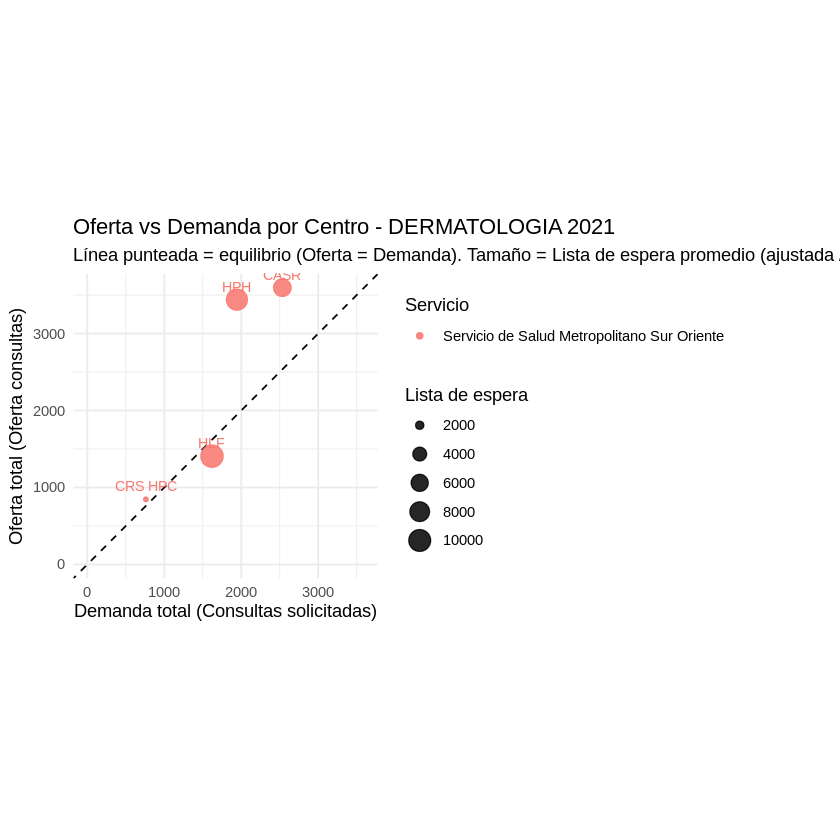

In [32]:
brecha_scatter_centros <- function(especialidad, anio){

  df <- cubo %>%
    filter(Especialidad == especialidad, Año == anio) %>%
    group_by(Centro_siglas, Servicio) %>%
    summarise(
      Demanda_total = sum(Consultas_solicitadas, na.rm = TRUE),
      Oferta_total  = sum(Oferta_consultas, na.rm = TRUE),
      Lista_espera  = sum(Lista_espera_inicial, na.rm = TRUE) / 3,
      .groups = "drop"
    ) %>%
    mutate(
      Brecha = Oferta_total - Demanda_total
    )

  lim <- max(c(df$Demanda_total, df$Oferta_total), na.rm = TRUE)

  ggplot(df, aes(x = Demanda_total, y = Oferta_total, color = Servicio, size = Lista_espera)) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
    geom_point(alpha = 0.85) +
    geom_text(aes(label = Centro_siglas), vjust = -0.8, size = 3, show.legend = FALSE) +
    coord_equal(xlim = c(0, lim), ylim = c(0, lim)) +
    labs(
      title = paste("Oferta vs Demanda por Centro -", especialidad, anio),
      subtitle = "Línea punteada = equilibrio (Oferta = Demanda). Tamaño = Lista de espera promedio (ajustada /3).",
      x = "Demanda total (Consultas solicitadas)",
      y = "Oferta total (Oferta consultas)",
      size = "Lista de espera",
      color = "Servicio"
    ) +
    theme_minimal()
}

brecha_scatter_centros("DERMATOLOGIA", 2021)


In [5]:
# Limpiar entorno
rm(list = ls())
gc()

# Cargar librerías necesarias
library(dplyr)
library(ggplot2)
library(readxl)

# Descargar y cargar el cubo
datos_multidimensionales <- "https://github.com/rlagosb/taller_eiv/raw/refs/heads/main/datos_multidimensionales/"

dest_cubo <- tempfile(fileext = ".xlsx")
download.file(
  paste0(datos_multidimensionales, "Cubo_consultas_nuevas.xlsx"),
  dest_cubo,
  mode = "wb",
  quiet = TRUE
)

cubo <- read_excel(dest_cubo)

# Verificación
glimpse(cubo)


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,685475,36.7,1455020,77.8,1455020,77.8
Vcells,1286717,9.9,8388608,64.0,6720986,51.3



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 3,776
Columns: 16
$ Periodo                <chr> "2021-T1", "2021-T1", "2021-T1", "2021-T1", "20…
$ Año                    <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,…
$ Mes                    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Trimestre              <chr> "T1", "T1", "T1", "T1", "T1", "T1", "T1", "T1",…
$ Centro_cod             <dbl> 114101, 114101, 114101, 114101, 114101, 114101,…
$ Especialidad_cod       <chr> "07-002", "07-003", "07-004", "07-005", "07-006…
$ Consultas_producidas   <dbl> 0, 242, 341, 127, 36, 22, 48, 114, 82, 118, 248…
$ Consultas_inasistencia <dbl> 0, 27, 21, 5, 1, 8, 5, 11, 16, 20, 51, 0, 10, 1…
$ Oferta_consultas       <dbl> 0, 269, 362, 132, 37, 30, 53, 125, 98, 138, 299…
$ Consultas_solicitadas  <dbl> 2, 426, 516, 0, 38, 20, 30, 140, 139, 141, 260,…
$ Lista_espera_inicial   <dbl> 7, 1811, 2944, 3, 79, 76, 367, 308, 759, 478, 1…
$ Especialidad           <chr> "ANESTESIOLOGIA", "CARDIOLOGIA", "CIRUGIA GENER…
$ `Riesgo mortal

In [6]:
unique(cubo$Especialidad)


[1] "ANESTESIOLOGIA"                                                    
 [2] "CARDIOLOGIA"                                                       
 [3] "CIRUGIA GENERAL"                                                   
 [4] "CIRUGIA DE CABEZA, CUELLO Y MAXILOFACIAL"                          
 [5] "CIRUGIA CARDIOVASCULAR"                                            
 [6] "CIRUGIA DE TORAX"                                                  
 [7] "CIRUGIA PLASTICA Y REPARADORA"                                     
 [8] "CIRUGIA PEDIATRICA"                                                
 [9] "CIRUGIA VASCULAR PERIFERICA"                                       
[10] "COLOPROCTOLOGIA"                                                   
[11] "DERMATOLOGIA"                                                      
[12] "DIABETOLOGIA"                                                      
[13] "ENDOCRINOLOGIA ADULTO"                                             
[14] "ENDOCRINOLOGIA PEDIATRICA"                                         
[15] "ENFERMEDADES RESPIRATORIAS DEL ADULTO (BRONCOPULMONAR)"            
[16] "ENFERMEDADES RESPIRATORIAS PEDIATRICAS (BRONCOPULMONAR PEDIATRICO)"
[17] "GASTROENTEROLOGIA ADULTO"                                          
[18] "GASTROENTEROLOGIA PEDIATRICA"                                      
[19] "GENETICA CLINICA"                                                  
[20] "GERIATRIA"                                                         
[21] "GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA"                       
[22] "HEMATOLOGIA"                                                       
[23] "IMAGENOLOGÍA"                                                      
[24] "INFECTOLOGIA"                                                      
[25] "INMUNOLOGIA"                                                       
[26] "MEDICINA FAMILIAR"                                                 
[27] "MEDICINA FISICA Y REHABILITACION (FISIATRIA ADULTO)"               
[28] "MEDICINA INTERNA"                                                  
[29] "MEDICINA NUCLEAR"                                                  
[30] "NEFROLOGIA ADULTO"                                                 
[31] "NEFROLOGIA PEDIATRICO"                                             
[32] "NEONATOLOGIA"                                                      
[33] "NEUROCIRUGIA"                                                      
[34] "NEUROLOGIA ADULTO"                                                 
[35] "NEUROLOGIA PEDIATRICA"                                             
[36] "OFTALMOLOGIA"                                                      
[37] "ONCOLOGIA MEDICA"                                                  
[38] "OTORRINOLARINGOLOGIA"                                              
[39] "PEDIATRIA"                                                         
[40] "PSIQUIATRIA ADULTO"                                                
[41] "PSIQUIATRIA PEDIATRICA Y DE LA ADOLESCENCIA"                       
[42] "RADIOTERAPIA ONCOLOGICA"                                           
[43] "REUMATOLOGIA"                                                      
[44] "TRAUMATOLOGIA Y ORTOPEDIA"                                         
[45] "UROLOGIA"                                                          
[46] "CARDIOLOGIA PEDIATRICA"                                            
[47] "CIRUGIA DIGESTIVA"                                                 
[48] "CIRUGIA PLASTICA Y REPARADORA PEDIATRICA"                          
[49] "GINECOLOGIA"                                                       
[50] "HEMATO-ONCOLOGIA PEDIATRICA"                                       
[51] "INFECTOLOGIA PEDIATRICA"                                           
[52] "MEDICINA FAMILIAR DEL NIÑO"                                        
[53] "MEDICINA FISICA Y REHABILITACION PEDIATRICA (FISIATRIA PEDIATRICA)"
[54] "NUTRIOLOGO"                                                        
[55] 

In [9]:
exists("cubo")


[1] TRUE

In [10]:
graficar_brechas_centro <- function(especialidad, anio) {

  cubo %>%
    dplyr::filter(Especialidad == especialidad, Año == anio) %>%
    dplyr::group_by(Periodo, Centro_siglas) %>%
    dplyr::summarise(
      Oferta_consultas      = sum(Oferta_consultas, na.rm = TRUE),
      Consultas_solicitadas = sum(Consultas_solicitadas, na.rm = TRUE),
      Lista_espera_inicial  = sum(Lista_espera_inicial, na.rm = TRUE),
      .groups = "drop"
    ) %>%
    dplyr::mutate(
      Lista_espera_inicial = Lista_espera_inicial / 3
    ) %>%
    dplyr::group_by(Centro_siglas) %>%
    dplyr::mutate(
      Demanda_acumulada = cumsum(Consultas_solicitadas),
      Oferta_acumulada  = cumsum(Oferta_consultas)
    ) %>%
    dplyr::ungroup() %>%
    ggplot() +
    geom_area(
      aes(x = Periodo, y = Demanda_acumulada + Lista_espera_inicial),
      fill = "#FF7F7F", alpha = 0.3
    ) +
    geom_area(
      aes(x = Periodo, y = Lista_espera_inicial),
      fill = "lightblue", alpha = 0.5
    ) +
    geom_line(
      aes(x = Periodo, y = Oferta_acumulada),
      color = "darkblue", linewidth = 1
    ) +
    geom_point(
      aes(x = Periodo, y = Oferta_acumulada),
      color = "darkblue", size = 2
    ) +
    facet_grid(~Centro_siglas) +
    scale_y_continuous(breaks = seq(0, 1600, by = 200)) +
    labs(
      title = paste("Brechas por Periodo (", especialidad, " ", anio, ")", sep = ""),
      x = "Periodo",
      y = "Cantidad",
      caption = "Azul claro: Lista de espera | Rojo: Demanda acumulada | Línea azul: Oferta acumulada"
    ) +
    theme_minimal()
}


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


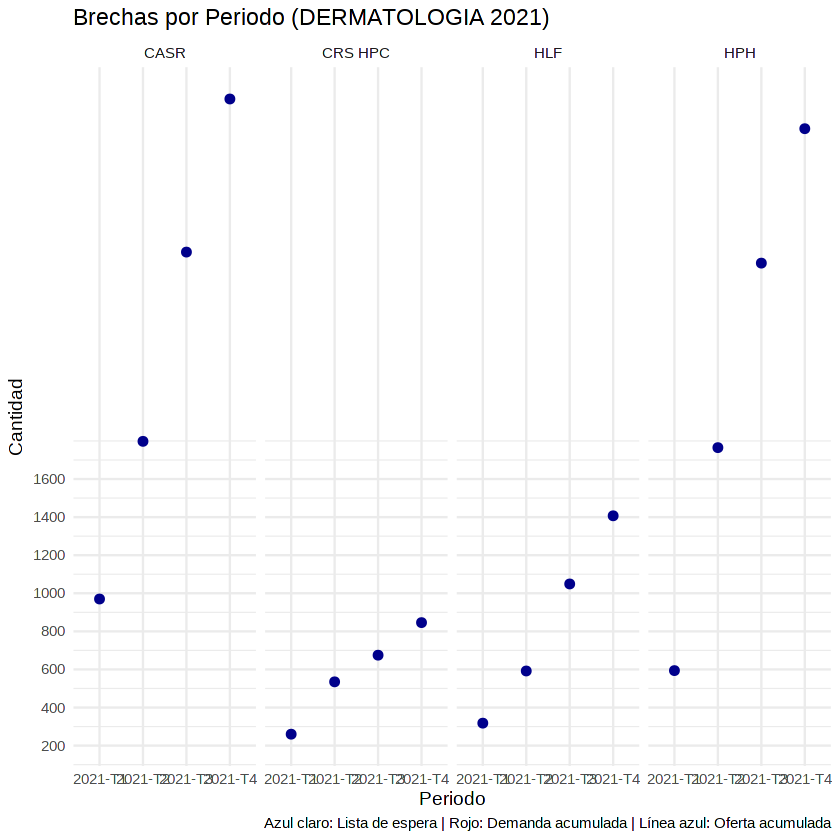

In [11]:
graficar_brechas_centro("DERMATOLOGIA", 2021)


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


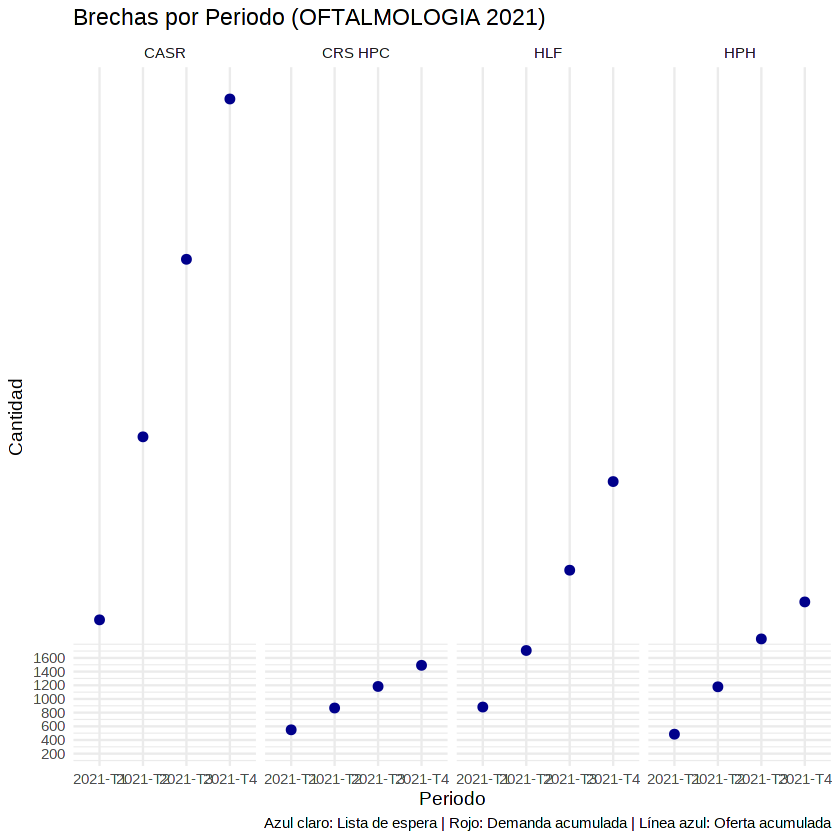

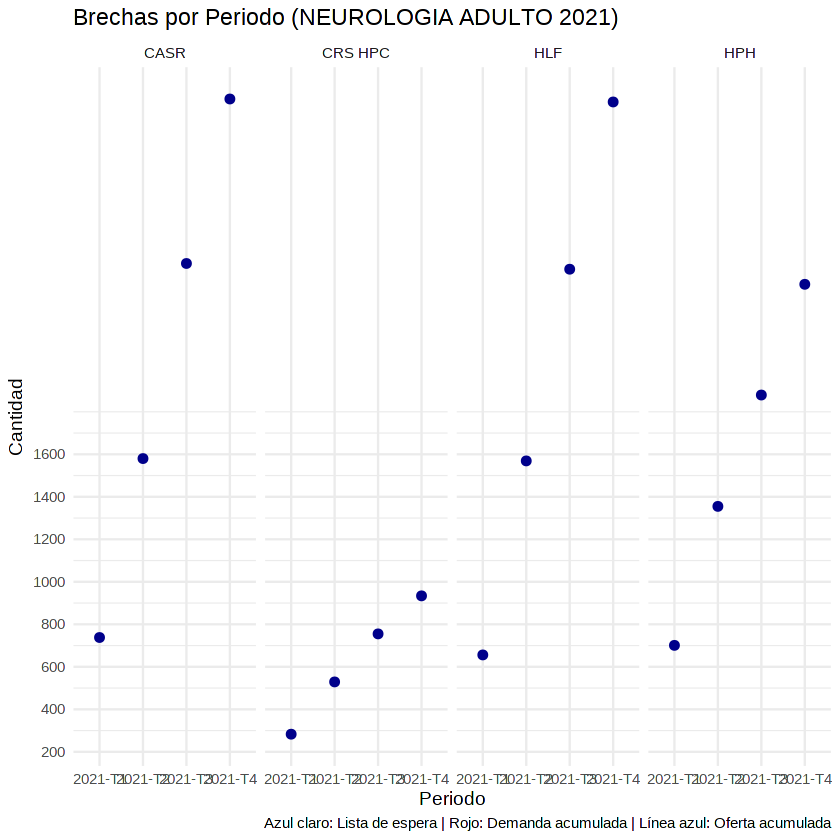

In [12]:
graficar_brechas_centro("OFTALMOLOGIA", 2021)
graficar_brechas_centro("NEUROLOGIA ADULTO", 2021)


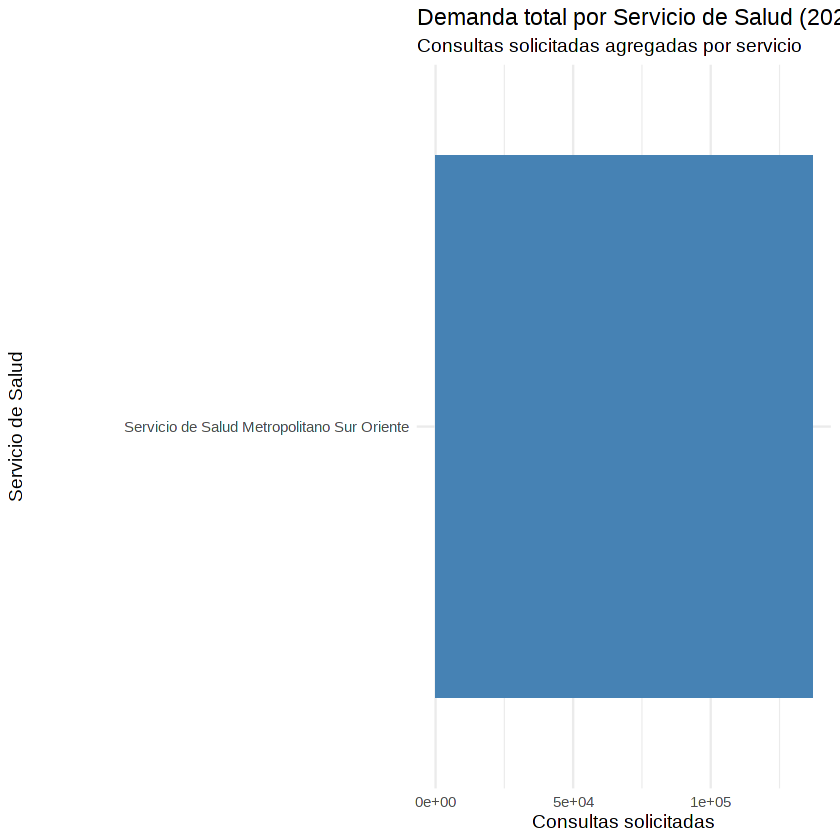

In [14]:
brecha_servicio <- cubo %>%
  dplyr::filter(Año == 2021) %>%
  dplyr::group_by(Servicio) %>%
  dplyr::summarise(
    Oferta_total  = sum(Oferta_consultas, na.rm = TRUE),
    Demanda_total = sum(Consultas_solicitadas, na.rm = TRUE),
    Brecha        = Oferta_total - Demanda_total,
    .groups = "drop"
  )

ggplot(
  brecha_servicio,
  aes(x = reorder(Servicio, Demanda_total), y = Demanda_total)
) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  theme_minimal() +
  labs(
    title = "Demanda total por Servicio de Salud (2021)",
    subtitle = "Consultas solicitadas agregadas por servicio",
    x = "Servicio de Salud",
    y = "Consultas solicitadas"
  )


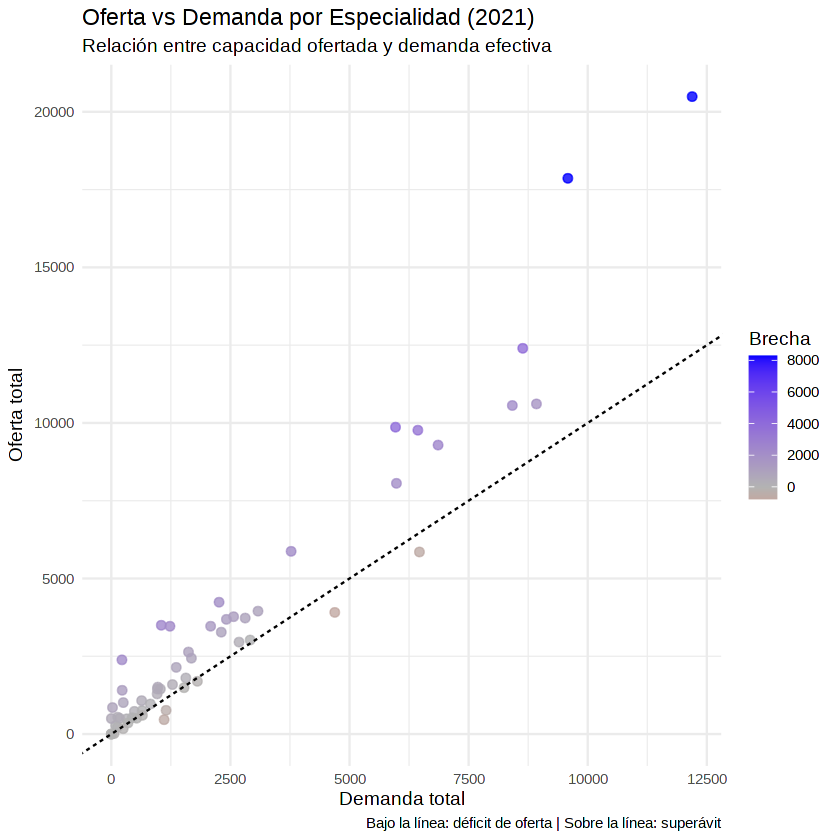

In [15]:
brecha_esp <- cubo %>%
  dplyr::filter(Año == 2021) %>%
  dplyr::group_by(Especialidad) %>%
  dplyr::summarise(
    Oferta_total  = sum(Oferta_consultas, na.rm = TRUE),
    Demanda_total = sum(Consultas_solicitadas, na.rm = TRUE),
    Brecha        = Oferta_total - Demanda_total,
    .groups = "drop"
  )

ggplot(
  brecha_esp,
  aes(x = Demanda_total, y = Oferta_total, color = Brecha)
) +
  geom_point(size = 2, alpha = 0.8) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  scale_color_gradient2(
    low = "red",
    mid = "gray70",
    high = "blue",
    midpoint = 0
  ) +
  theme_minimal() +
  labs(
    title = "Oferta vs Demanda por Especialidad (2021)",
    subtitle = "Relación entre capacidad ofertada y demanda efectiva",
    x = "Demanda total",
    y = "Oferta total",
    color = "Brecha",
    caption = "Bajo la línea: déficit de oferta | Sobre la línea: superávit"
  )


## 🏁 Discusión

1. ¿Qué tendría que hacer para reproducir el análisis con datos de 2024?
4. ¿Qué tendría que hacer para replicar el análisis en otro Servicio de Salud?
4. ¿Qué tendría que hacer si necesitara incorporar variables que no están en el cubo (ejemplo: solicitudes de interconsultas GES)?

# Plotly❓

Por desgracia, la integración de R en Colab todavía no está completa. Por esta razón no se despliegan gráficos interactivos ni tablas o módulos que contengan HTML por razones de seguridad 😞.

De todas formas, dejamos un enlace de esta potente librería para su conocimiento: [**GGplotly**](https://www.datacamp.com/datalab/w/566df73a-45bc-488a-8ccf-0e7ade9ddb10/edit/4_Ejercicio_visualizaciones_y_reportes(R).ipynb)